#### KNN is used for classification problems

#### Pros of KNN :
    1.Very Simple
    2.Training is trivial
    3.works with any number of classes
    4.Easy to add more data
    5.Few parameters:
        a.K
        b.Distance Metric
        
#### Cons of KNN:
    1.High Prediction Cost(Worst for large dataset)
    2.Not good with high dimensional data (if more features then it will be dificult to calculate distance in all directions)
    3.Categorical Features dont work well



In [54]:
example_df=pd.DataFrame([['Ram',10,'M','Cricket'],['Rubi',15,'F','Football'],['Rahul',21,'M','Football'],['Mohan',20,'M','Cricket'],['Angelina',17,'F','To be predicted']]
                        ,columns=['Name','Age','Gender','Game'])

In [55]:
example_df

,Name,Age,Gender,Game
0,Ram,10,M,Cricket
1,Rubi,15,F,Football
2,Rahul,21,M,Football
3,Mohan,20,M,Cricket
4,Angelina,17,F,To be predicted


### Concept Of KNN Calculation: In above example dataframe suppose 

if a ned member joins named "angelina" whose age is 17 and gender is "F" now we have top predict which game will she like 

Solution :we will calcutae three type of distance according to our choice of distance :

        1.Euclidean distance 
        2.Manhattan distance 
        3.Minkowski Distance
we will convert gender in column in numerical column suppose for "M" its 0 and for "F" its 1

Now we will calculate first distance from Ram like :

    d1=sqrt{(10-17)+(Ram's Gender-Agelinas Gender)}     = 10.05
    
    d2=sqrt{(15-17)+(Rubi's gender-Angelinas Gender)}   = 12
    
    d3=sqrt{(21-17)+(Rahul's age-Angelina's Age)}       = 15  
    
    d4=sqrt{(20-17)+(Mohan's Gender-Agelina's Gender)}  = 9.05
                     
                     for k=3 two nearest neighbors are Ram('Cricket') and Mohan('Cricket') and Rubi('Football') 
                     
                     in which "Cricket is most common so Angelina's game category will be "Cricket"   

In [71]:
import numpy as np 
import pandas as pd

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df=pd.read_csv('D:/DataScience_Udemy/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/14-K-Nearest-Neighbors/Classified Data',index_col=0)

In [74]:
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


#### Now we will standardized our data means 

We will keep our all data on same scale using "StandardScaler" 

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [77]:
scaler

StandardScaler()

In [78]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [79]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [80]:
scaled_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [81]:
df_feat=pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [82]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [83]:
import sklearn 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x=df_feat
y=df['TARGET CLASS']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn=KNeighborsClassifier(n_neighbors=1)

In [88]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [89]:
predictions=knn.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report

In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [99]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i=knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

#### will plot elbow method and find which "K" value is good for model 

### Check Below :--->>>

Text(0, 0.5, 'error_rate')

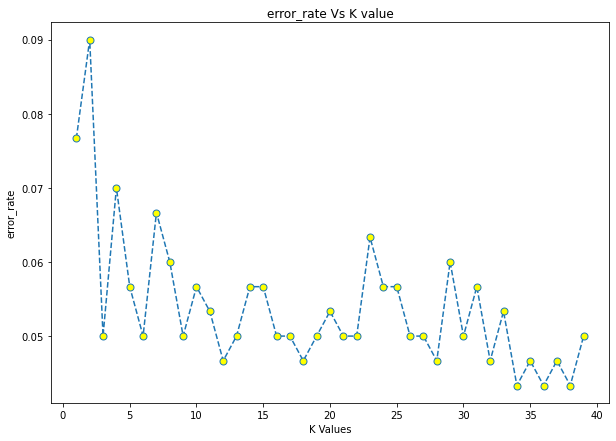

In [115]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40),error_rate,marker='o',markerfacecolor='yellow',markersize=7,linestyle='dashed')
plt.title('error_rate Vs K value')
plt.xlabel('K Values')
plt.ylabel('error_rate')

from above plot we can see "***K=17 or 33/34 or 36*** " is giving less error_rate

#### So,these "K" values will be good for model

In [122]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions_17=knn.predict(X_test)
print(classification_report(y_test,predictions_17))
print("\n")
print(confusion_matrix(y_test,predictions_17))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



[[153   6]
 [  9 132]]
